In [222]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.preprocessing import LabelEncoder
# to encode labels to numbers
from sklearn.preprocessing import StandardScaler # to standardize
from sklearn.svm import SVC # import support vector classifier
from sklearn.inspection import DecisionBoundaryDisplay
# this import allows for visualization of decision regions formulated by models
from sklearn.metrics import f1_score, accuracy_score, precision_score, \
    recall_score, confusion_matrix, ConfusionMatrixDisplay, classification_report


plt.style.use('bmh')

#import necessary methods and libraries

# 1. Data Understanding
View Data


Dtypes

Describe

Shape

In [223]:
df = pd.read_csv('IRIS.csv')

#initial view of data
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [224]:
print(f"Num columns {df.shape[1]}")
print(f"Num rows {df.shape[0]}")
print(df.shape)

Num columns 5
Num rows 150
(150, 5)


In [225]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [226]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [227]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

# 2. Data Preparation
Drop unused rows/columns 

Identify duplicates/null values 

Rename columns if needed

Feature creation

In [228]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [229]:
df.duplicated()
# no duplicates or null values found

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool

In [230]:
# all rows/columns will be used, for training and testing
# but we will use 2 values for sample visualization
# im fine with column labels
encoder = LabelEncoder()



x2 = df.drop(['species', 'petal_length', 'petal_width'], axis=1)
x = df.drop(['species'],axis=1)
y = df[['species']]

encoded_y = encoder.fit_transform(y)


x2_train, x2_test, y2_train, y2_test = train_test_split(x2,y, test_size=0.2)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)
# encoded_y


c:\Users\brady\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# 3. Feature Understanding
Get a feel for the features themselves

Text(0.5, 0.98, 'Histograms for Different Iris Flower Features')

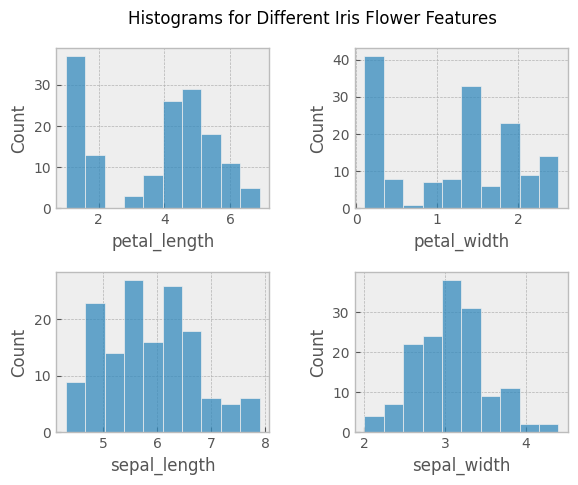

In [231]:
plt.subplot(2, 2, 1)
plt.subplots_adjust(wspace=0.4, hspace=0.4, left=0.1, right=0.9, top=0.9, bottom=0.1)

sns.histplot(data=df, x='petal_length', bins=10)
plt.subplot(2, 2, 2)
sns.histplot(data=df, x='petal_width', bins=10)
plt.subplot(2, 2, 3)
sns.histplot(data=df, x='sepal_length', bins=10)
plt.subplot(2, 2, 4)
sns.histplot(data=df, x='sepal_width', bins=10)

plt.suptitle("Histograms for Different Iris Flower Features")

<Axes: xlabel='species', ylabel='count'>

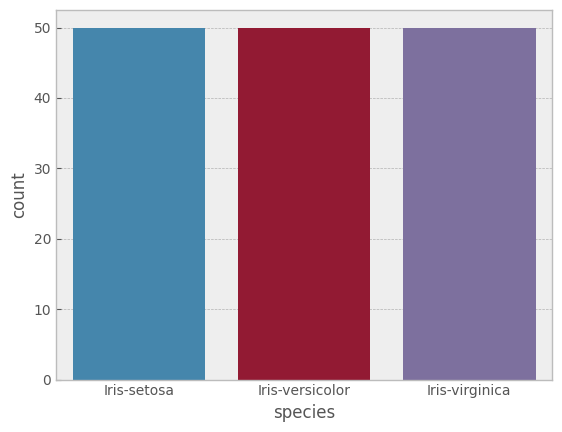

In [232]:
sns.countplot(data=df, x='species',hue='species')
# we have an even distribution of 50-50-50 different species

# 4. Feature Relationships
Find any sort of correlation/relationship between different features

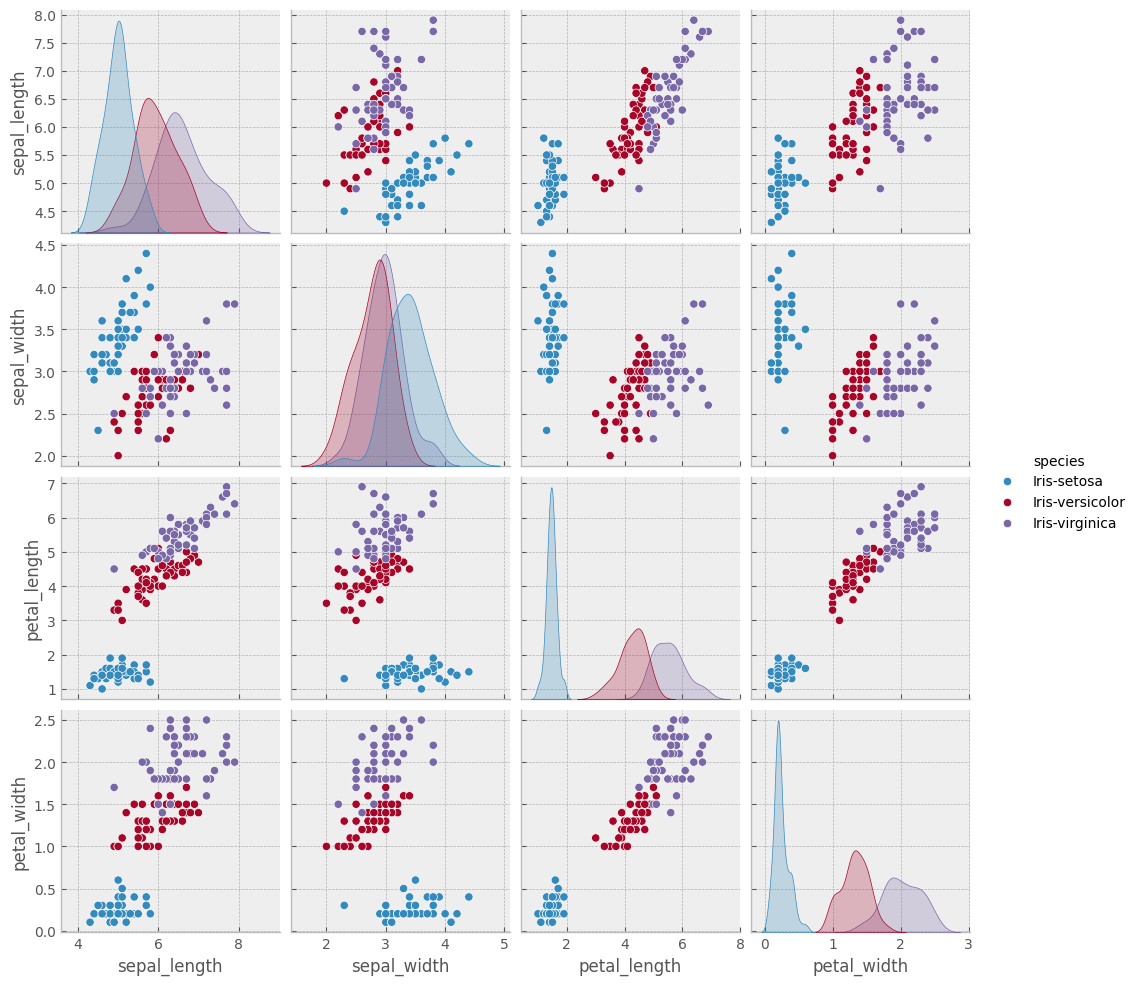

In [233]:
sns.pairplot(data=df, hue='species')

<Axes: >

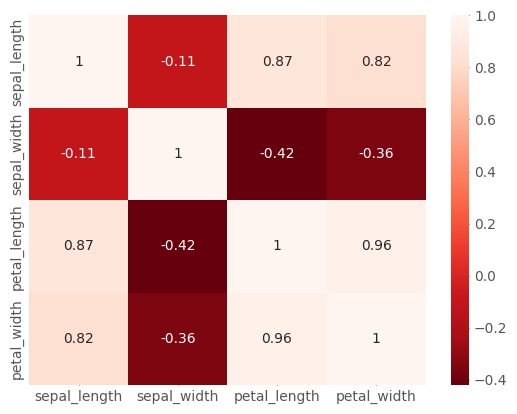

In [234]:
df_corr = df.drop(['species'],axis=1).corr()
sns.heatmap(df_corr, cmap="Reds_r",annot=True)
# here we see petal width vs length have the strongest corr
# followed by petal and sepal length

# 5. Feature Engineering
Build and evaluate ML models

Cross-validate and tune hyperparameters where necessary

### When to Simplify Metric Reports

High-Level Summaries – If presenting to a non-technical audience, a single metric (like F1-score or accuracy) might be enough.

Balanced Datasets – If classes are balanced, accuracy alone can sometimes be sufficient.

Consistent Performance – If training and test scores are similar across all metrics, you might only report key ones like F1-score or accuracy.

### When to Use All Metric Reports

Model Evaluation & Debugging - for fine-tuning a model, seeing metrics will help to see problems like:
* Overfitting (high train scores, low test scores)
* Underfitting (low scores on both partitions)
* Class Imbalance Effects (poor evaluation for minority classes)

Balanced Datasets - classes are balanced, accuracy alone may be sufficient

Consistent Performacne -if training and test scores are similar across all metrics, consider only reporting key metrics like F1 or accuracy

### 5.1 Support Vector Machine
Evaluate which kernels to use for the SVM

SKF Results (Accuracy): [0.625      0.79166667 0.83333333 0.79166667 0.79166667 0.75
 0.79166667 0.875      0.79166667 0.75       0.83333333 0.625
 0.75       0.83333333 0.75      ]
Mean Accuracy: 0.7722222222222223
SKF Results (Accuracy): [0.625      0.79166667 0.83333333 0.79166667 0.70833333 0.75
 0.66666667 0.875      0.75       0.75       0.83333333 0.625
 0.79166667 0.875      0.75      ]
Mean Accuracy: 0.7611111111111111
SKF Results (Accuracy): [0.70833333 0.70833333 0.83333333 0.75       0.66666667 0.66666667
 0.70833333 0.70833333 0.75       0.79166667 0.70833333 0.625
 0.75       0.70833333 0.83333333]
Mean Accuracy: 0.7277777777777779
SKF Results (Accuracy): [0.625      0.75       0.75       0.75       0.75       0.79166667
 0.625      0.79166667 0.79166667 0.58333333 0.75       0.70833333
 0.75       0.83333333 0.75      ]
Mean Accuracy: 0.7333333333333333


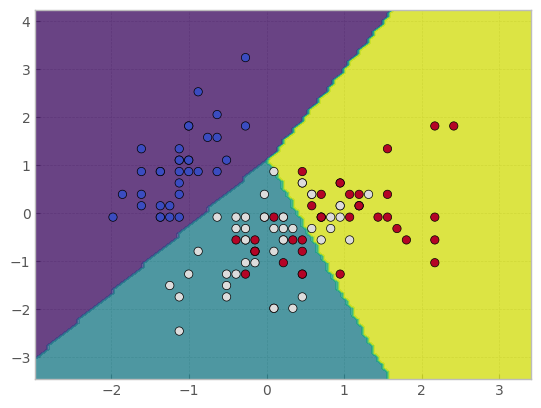

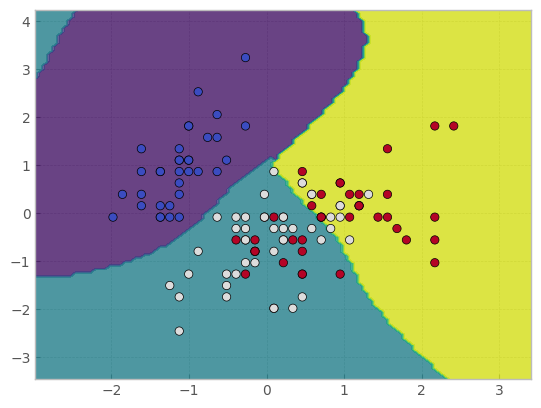

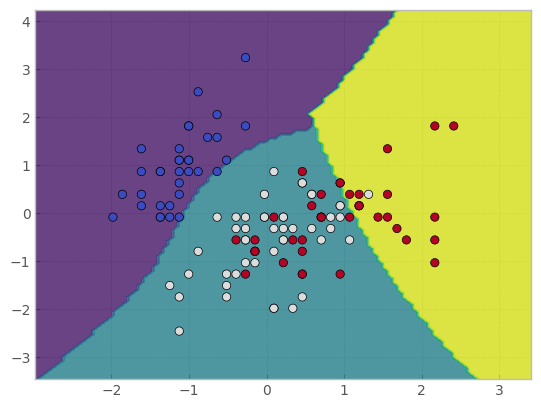

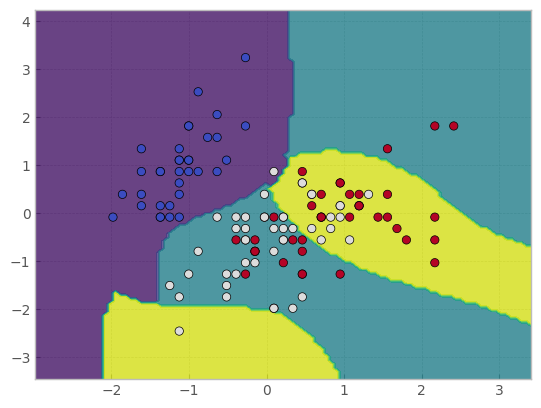

In [235]:
# to visualize, we will first apply on 2d set
scaler = StandardScaler()
kernels = ['linear', 'rbf', 'poly', 'sigmoid']
x2_train = scaler.fit_transform(x2_train)
x2_test = scaler.transform(x2_test)

for i, kernel in enumerate (kernels):
    clf = svm.SVC(kernel = kernel)
    clf.fit(x2_train,y2_train.values.ravel())
    
    skf = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)
    # 5 partitions, run the cross validation 3 times, with shuffled partitions
    
    skf_results = cross_val_score(clf, x2_train, y2_train.values.ravel(), cv=skf)
    
    print(f'SKF Results (Accuracy): {skf_results}')
    print(f'Mean Accuracy: {skf_results.mean()}')
  
    encoded_y2 = encoder.fit_transform(y2_train.values.ravel())
    
    disp = DecisionBoundaryDisplay.from_estimator(clf,x2_train,response_method='predict',alpha=0.8)
    disp.ax_.scatter(x2_train[:, 0], x2_train[:, 1], c=encoded_y2, 
                     cmap=plt.cm.coolwarm, edgecolor='k')
    
    # plt.show()
    

In [236]:
for i, kernel in enumerate (kernels):
    clf = svm.SVC(kernel = kernel)
    clf.fit(x_train,y_train.values.ravel())
    
    rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)
    # does 
    
    rskf_results = cross_val_score(clf, x_train, y_train.values.ravel(), cv=rskf)
    # note,
    
    print(f'SKF Results (Accuracy): {rskf_results}')
    print(f'Mean Accuracy: {rskf_results.mean()}')
    
    # performance for linear model seems good, we will use this kernel

SKF Results (Accuracy): [0.95833333 1.         0.95833333 1.         0.95833333 0.95833333
 1.         0.91666667 1.         1.         0.95833333 1.
 0.91666667 1.         1.        ]
Mean Accuracy: 0.975
SKF Results (Accuracy): [0.95833333 0.95833333 0.95833333 1.         1.         0.95833333
 1.         0.91666667 0.95833333 1.         1.         0.95833333
 0.91666667 1.         0.95833333]
Mean Accuracy: 0.9694444444444446
SKF Results (Accuracy): [0.95833333 0.95833333 0.95833333 0.95833333 0.95833333 0.95833333
 0.95833333 0.91666667 1.         1.         0.91666667 0.95833333
 0.91666667 1.         1.        ]
Mean Accuracy: 0.961111111111111
SKF Results (Accuracy): [0.33333333 0.33333333 0.375      0.375      0.375      0.33333333
 0.33333333 0.375      0.375      0.375      0.33333333 0.33333333
 0.375      0.375      0.375     ]
Mean Accuracy: 0.35833333333333334


In [237]:
'''
things to evaluate a classification model: metrics such as accuracy, 
precision, recall, F1 score and confusion matrix
since we are trying to evaluate models, we will report all metrics for training/testing
ACCURACY - # of correct predictions : # of total predictions
    ^ fundamental metric
PRECISION - # of correctly predicted positives : (# of actual positive + false positive)
    ^ proportion of all predicted positives and correctly predicted positives, higher = less false positives
RECALL - # of correctly predicted postives : (# of actual positive + # false negatives)
    ^ true positive rate: proportion of all actual positives that were classified correctly as positive
    ^ higher = less false negatives 
F1 - basically a mix of precision and recall, like accuracy. Tells how well the model performs
           in minimizing false positives and negatives
    ^ Micro - averages of all f1 scores for classes, treats classes equally WE WILL USE
    ^ Macro - computes global f1 score, gives more weight to larger classes, better for imbalanced classes
'''

'\nthings to evaluate a classification model: metrics such as accuracy, \nprecision, recall, F1 score and confusion matrix\nsince we are trying to evaluate models, we will report all metrics for training/testing\nACCURACY - # of correct predictions : # of total predictions\n    ^ fundamental metric\nPRECISION - # of correctly predicted positives : (# of actual positive + false positive)\n    ^ proportion of all predicted positives and correctly predicted positives, higher = less false positives\nRECALL - # of correctly predicted postives : (# of actual positive + # false negatives)\n    ^ true positive rate: proportion of all actual positives that were classified correctly as positive\n    ^ higher = less false negatives \nF1 - basically a mix of precision and recall, like accuracy. Tells how well the model performs\n           in minimizing false positives and negatives\n    ^ Micro - averages of all f1 scores for classes, treats classes equally WE WILL USE\n    ^ Macro - computes glo

In [238]:
# data fram to display evaluation results to later interpret
tests = ['Accuracy test', 'Accuracy train', 
           'Precision test', 'Precision train',
           'Recall test', 'Recall train',
           'F1 macro test', 'F1 macro train']
evals = pd.DataFrame(index=tests)

In [ ]:
# function to create a table for all metrics for every model made
# use the same data
# note: when to standardize? a model assume normality or relies on distance
# ex: SVMS, regression, KNN, MLP 
# when not to do: tree-based methods (random forests, gradient boosting, decision trees, naive bayes)
x_train_standard = scaler.fit_transform(x_train)
x_test_standard = scaler.transform(x_test)
def evaluation(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    vals = []
    y_pred_train = model.predict(x_train)
    # predicted y values on the training subset
    y_pred_test = model.predict(x_test)
    # predicted y values on testing subset
    res_test = classification_report(y_test,y_pred_test, output_dict=True)
    res_train = classification_report(y_true=y_train, y_pred=y_pred_train, output_dict=True)
    
    vals.append(accuracy_score(y_true=y_test, y_pred=y_pred_test))
    vals.append(accuracy_score(y_true=y_train, y_pred=y_pred_train))
    
    vals.append(res_test['weighted avg']['precision'])
    vals.append(res_train['weighted avg']['precision'])
    
    vals.append(res_test['weighted avg']['recall'])
    vals.append(res_train['weighted avg']['recall'])
    
    vals.append(res_test['weighted avg']['f1-score'])
    vals.append(res_train['weighted avg']['f1-score'])
    # append metrics to a list to add to evaluation dataframe for later interpretation
    
    return vals
    
    
    

In [262]:
clf = SVC(kernel='linear', probability=True,random_state=42)
scores = evaluation(clf, x_train_standard, x_test_standard, y_train, y_test)
evals['SVM'] = scores
evals


c:\Users\brady\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,SVM
Accuracy test,0.966667
Accuracy train,0.975000
Precision test,0.970833
Precision train,0.976630
Recall test,0.966667
Recall train,0.975000
F1 macro test,0.966901
F1 macro train,0.974934
